#### BRCA UMAP, setup cells

Adapted from: d_umap_normed_BRCA.ipynb  
Goal is to reduce subtype count (from BLCA) and put  
scatter plots in a loop to run on arbitrary subtype counts

In [ ]:
# Data path notes - switch to relative paths for shared repo
    # raw normed
    # /Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normed_data/test_norm.tsv
    # decoded
    # b_model/decoded/BRCA_10k_outlier_cut_train_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv

In [2]:
%whos

Interactive namespace is empty.


In [ ]:
ls /Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normalized_data/flat/

In [3]:
ls ../b_model/decoded/

BLCA_10k_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BLCA_10k_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BLCA_1k_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BLCA_1k_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BLCA_500_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BLCA_500_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_test_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_test_15_epochs_2_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_train_15_epochs_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_10k_outlier_cut_train_15_epochs_2_100_latent_dim_2022-10-13_1Dmodel.ipynb.tsv
BRCA_fine_tune_10k_outlier_cut_test_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BRCA_fine_tune_10k_outlier_cut_train_20_epochs_100_latent_dim_2022-10-13_1D_model.ipynb.tsv
BRCA_fin

In [5]:
import umap.umap_ as umap
import glob as glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [93]:
def relabel(unit, lbl_set):
    umap_labels = []
    for i in unit.Labels:
        if i == unit.Labels.unique()[0]:
            umap_labels.append(unit.Labels.unique()[0]+'_'+lbl_set)
        if i == unit.Labels.unique()[1]:
            umap_labels.append(unit.Labels.unique()[1]+'_'+lbl_set)
        if i == unit.Labels.unique()[2]:
            umap_labels.append(unit.Labels.unique()[2]+'_'+lbl_set)
        if i == unit.Labels.unique()[3]:
            umap_labels.append(unit.Labels.unique()[3]+'_'+lbl_set)
        if i == unit.Labels.unique()[4]:
            umap_labels.append(unit.Labels.unique()[4]+'_'+lbl_set)
        if i == unit.Labels.unique()[5]:
            umap_labels.append(unit.Labels.unique()[5]+'_'+lbl_set)
    unit.Labels = umap_labels
    return(unit)

In [64]:
end = len(unit.Labels.unique())+1

In [65]:
end

7

In [66]:
list(range(1, end))

[1, 2, 3, 4, 5, 6]

In [69]:
def relabel(unit, lbl_set): # Fully automated relabel function; to test
    umap_labels = []
    end = len(unit.Labels.unique())+1
    # label_count = list(range(0, end))
    for i in unit.Labels:
        for j in list(range(0, end)):
            if i.split('_')[1] == j:
                umap_labels.append(i+'_'+lbl_set)
    unit.Labels = umap_labels
    return(unit)

In [6]:
# switch to auto date per data_structure_05
date = '2022_10_24' # auto BRCA plot
# prep for run 1D model

In [86]:
version = 'd_umap_normed_BRCA_01.ipynb' # for file name

In [87]:
robust_train_y_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_y_train_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [88]:
robust_train_X_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_X_train_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [89]:
lbld_trn = pd.concat(
    [robust_train_y_raw,
     robust_train_X_raw], axis = 1)

In [90]:
unit = lbld_trn

In [91]:
lbl_set = 'train_raw'

In [92]:
umap_labels = [] # BRCA trn
for i in unit.Labels:
    if i == unit.Labels.unique()[0]:
        umap_labels.append(unit.Labels.unique()[0]+'_'+lbl_set)
    if i == unit.Labels.unique()[1]:
        umap_labels.append(unit.Labels.unique()[1]+'_'+lbl_set)
    if i == unit.Labels.unique()[2]:
        umap_labels.append(unit.Labels.unique()[2]+'_'+lbl_set)
    if i == unit.Labels.unique()[3]:
        umap_labels.append(unit.Labels.unique()[3]+'_'+lbl_set)
unit.Labels = umap_labels

In [ ]:
lbld_trn

In [95]:
robust_test_X_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_X_test_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [96]:
robust_test_y_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BRCA_y_test_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [97]:
lbld_tst = pd.concat(
    [robust_test_y_raw,
     robust_test_X_raw], axis = 1)

In [98]:
unit = lbld_tst

In [99]:
lbl_set = 'test_raw'

In [100]:
umap_labels = [] # BRCA trn
for i in unit.Labels:
    if i == unit.Labels.unique()[0]:
        umap_labels.append(unit.Labels.unique()[0]+'_'+lbl_set)
    if i == unit.Labels.unique()[1]:
        umap_labels.append(unit.Labels.unique()[1]+'_'+lbl_set)
    if i == unit.Labels.unique()[2]:
        umap_labels.append(unit.Labels.unique()[2]+'_'+lbl_set)
    if i == unit.Labels.unique()[3]:
        umap_labels.append(unit.Labels.unique()[3]+'_'+lbl_set)
unit.Labels = umap_labels

In [ ]:
lbld_tst

In [105]:
len(lbld_trn)

746

In [106]:
len(lbld_tst)

249

In [102]:
lbld_full = pd.concat(
    [lbld_trn, lbld_tst])

In [103]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(lbld_full.iloc[:,1:])
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(lbld_full.Labels))

In [108]:
embdDF

,Labels,x,y
0,BRCA_1_train_raw,10.961874,3.590715
1,BRCA_3_train_raw,8.920534,4.390719
2,BRCA_1_train_raw,8.521671,7.129023
3,BRCA_1_train_raw,13.052517,7.690076
4,BRCA_3_train_raw,8.564087,4.913060
...,...,...,...
990,BRCA_1_test_raw,12.395612,8.036884
991,BRCA_1_test_raw,12.124071,5.863679
992,BRCA_1_test_raw,13.047102,7.276696
993,BRCA_2_test_raw,11.814988,5.236668


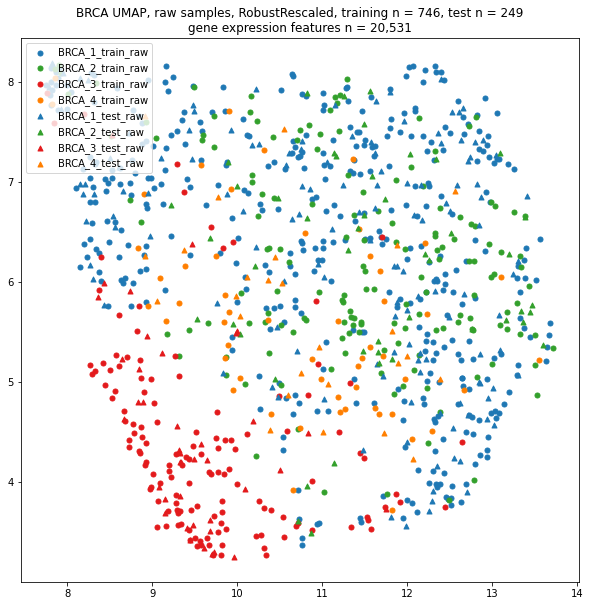

In [110]:
# BRCA
dot_size = 25

fig = plt.figure(figsize = (10, 10))

# train_raw = 'BRCA_1_train_raw' # raw is odd color indices
plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_train_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_1_train_raw'].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='o', label = 'BRCA_1_train_raw')

# train_raw = 'BRCA_2_train_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_train_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_2_train_raw'].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='o', label = 'BRCA_2_train_raw')

# train_raw = 'BRCA_3_train_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_train_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_3_train_raw'].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='o', label = 'BRCA_3_train_raw')

# train_raw = 'BRCA_4_train_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_train_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_4_train_raw'].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='o', label = 'BRCA_4_train_raw')

# raw test blocks
# test_raw = 'BRCA_1_test_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_1_test_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_1_test_raw'].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='^', label = 'BRCA_1_test_raw')

# test_raw = 'BRCA_2_test_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_2_test_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_2_test_raw'].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='^', label = 'BRCA_2_test_raw')

# test_raw = 'BRCA_3_test_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_3_test_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_3_test_raw'].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='^', label = 'BRCA_3_test_raw')

# test_raw = 'BRCA_4_test_raw'
plt.scatter(embdDF[embdDF.Labels == 'BRCA_4_test_raw'].x,
            embdDF[embdDF.Labels == 'BRCA_4_test_raw'].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='^', label = 'BRCA_4_test_raw')

plt.title('BRCA UMAP, raw samples, RobustRescaled,'
          ' training n = '+str(len(lbld_trn))+
          ', test n = '+str(len(lbld_tst))+'\n'+
          'gene expression features n = 20,531')
          
plt.legend(loc = 'upper left')
plt.savefig('out/'+
            'BRCA_raw_robust_'+version+'_'+date+'_r1.png')

In [ ]:
# BLCA devel

In [83]:
version = 'd_umap_normed_BLCA_01.ipynb' # for file name

In [ ]:
# Concat y frame to X, axis 1 on trn and tst - done
# Then relabel - 
# Then concat axis 0

# starting with umap on Robust on BLCA normalized raw

# List of labeled objects to stack:
#     nrm_raw_trn
#     nrm_raw_tst
#     decod_tst
#     decod_trn

In [21]:
robust_train_y_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BLCA_y_train_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [30]:
robust_train_y_raw.head(1)

,Labels
BLCA,
TCGA-CU-A5W6,BLCA_2


In [20]:
robust_train_X_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BLCA_X_train_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [31]:
robust_train_X_raw.head(1)

,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,N:GEXP::?:317712:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-CU-A5W6,0.0,-0.476607,-0.023632,0.000244,1.366149,0.0,-0.559106,0.0,0.0,0.0,...,0.078331,0.127128,-0.603342,0.629275,0.494509,-0.307654,-0.590046,-0.41979,2.947385,0.4931


In [32]:
lbld_trn = pd.concat(
    [robust_train_y_raw,
     robust_train_X_raw], axis = 1)

In [38]:
lbld_trn.head(1)

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-CU-A5W6,BLCA_2,0.0,-0.476607,-0.023632,0.000244,1.366149,0.0,-0.559106,0.0,0.0,...,0.078331,0.127128,-0.603342,0.629275,0.494509,-0.307654,-0.590046,-0.41979,2.947385,0.4931


In [39]:
lbld_trn.shape

(299, 20532)

In [40]:
unit = lbld_trn

In [41]:
lbl_set = 'train_raw'

In [42]:
unit.Labels.unique()

array(['BLCA_2', 'BLCA_3', 'BLCA_1', 'BLCA_4', 'BLCA_5', 'BLCA_6'],
      dtype=object)

In [47]:
umap_labels = [] # BLCA, label auto raw, template for any primary with 6 subs
for i in unit.Labels:
    if i == unit.Labels.unique()[0]:
        umap_labels.append(unit.Labels.unique()[0]+'_'+lbl_set)
    if i == unit.Labels.unique()[1]:
        umap_labels.append(unit.Labels.unique()[1]+'_'+lbl_set)
    if i == unit.Labels.unique()[2]:
        umap_labels.append(unit.Labels.unique()[2]+'_'+lbl_set)
    if i == unit.Labels.unique()[3]:
        umap_labels.append(unit.Labels.unique()[3]+'_'+lbl_set)
    if i == unit.Labels.unique()[4]:
        umap_labels.append(unit.Labels.unique()[4]+'_'+lbl_set)
    if i == unit.Labels.unique()[5]:
        umap_labels.append(unit.Labels.unique()[5]+'_'+lbl_set)
unit.Labels = umap_labels

In [72]:
lbld_trn

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-CU-A5W6,BLCA_2_train_raw,0.0,-0.476607,-0.023632,0.000244,1.366149,0.0,-0.559106,0.000000,0.000,...,0.078331,0.127128,-0.603342,0.629275,0.494509,-0.307654,-0.590046,-0.419790,2.947385,0.4931
TCGA-4Z-AA7R,BLCA_3_train_raw,0.0,3.047875,1.896749,2.103757,-0.690249,0.0,-0.075391,1.500759,43.614,...,0.310941,0.110173,-0.675307,0.322770,0.228245,-0.365948,-0.509910,0.678838,0.423697,0.4450
TCGA-ZF-AA4V,BLCA_1_train_raw,0.0,-0.618560,-0.222488,-0.353163,0.135989,0.0,0.327067,0.703760,0.000,...,0.538887,0.878738,-0.023061,3.031184,-0.719168,0.137301,-0.654955,-0.528975,-0.250345,0.4174
TCGA-C4-A0F6,BLCA_2_train_raw,0.0,-0.375678,-0.431093,-0.094745,-0.885974,0.0,-0.248482,1.239926,0.000,...,1.063882,0.812276,-0.339109,0.413839,1.274277,0.121712,0.286069,-0.524343,-0.208936,0.0000
TCGA-4Z-AA86,BLCA_1_train_raw,0.0,-0.026360,-0.497736,-0.351458,-0.167066,0.0,-0.387941,1.128983,0.000,...,0.174863,-0.148948,-0.974607,0.215154,0.572579,0.525367,2.045419,1.854840,0.226964,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-CF-A47W,BLCA_2_train_raw,0.0,-0.618560,-0.368154,-0.462644,1.344249,0.0,-0.352665,0.000000,0.000,...,-0.347546,-0.204607,-0.740470,-0.200160,-0.885369,-0.087879,-0.069919,-0.543731,6.371319,0.0000
TCGA-FD-A62O,BLCA_2_train_raw,0.0,0.792752,0.508922,0.459478,-0.915778,0.0,3.582880,2.658405,0.000,...,-0.938653,0.313493,0.545986,-0.148415,0.731690,0.002905,-0.549681,0.588647,-0.226709,0.0000
TCGA-CF-A1HR,BLCA_2_train_raw,0.0,0.586381,-0.209201,-0.639664,0.249870,0.0,-0.654511,0.000000,0.000,...,0.177652,0.065245,0.675590,-0.048104,-0.156810,-0.684661,-0.292353,-0.985746,-0.213201,0.0000


In [22]:
robust_test_X_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BLCA_X_test_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [23]:
robust_test_y_raw = pd.read_csv(
    '../a_data_structure/normalized_data/flat/BLCA_y_test_flat_no_cut_Robust.tsv',
    sep = '\t',
    index_col = 0)

In [34]:
lbld_tst = pd.concat(
    [robust_test_y_raw,
     robust_test_X_raw], axis = 1)

In [45]:
unit = lbld_tst

In [46]:
lbl_set = 'test_raw'

In [71]:
lbld_tst

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-G2-AA3B,BLCA_2_test_raw,0.0,-0.317882,-0.675209,0.102417,1.549484,0.0,0.720960,0.000000,0.000,...,0.937944,3.605809,0.198658,-0.081574,-0.429521,-0.246579,0.246451,-0.552815,-0.412158,0.0
TCGA-GV-A40E,BLCA_1_test_raw,0.0,-0.085592,-0.733131,-0.180479,-0.094483,0.0,0.107861,0.000000,0.000,...,-0.515818,-0.381313,-0.863426,0.116032,-0.864714,0.172321,-0.429027,-0.660240,-0.308451,0.0
TCGA-DK-AA6M,BLCA_1_test_raw,0.0,-0.443624,-0.875483,0.225294,-0.960851,0.0,1.382304,1.137245,0.000,...,-0.924407,-0.913435,-0.563945,-0.277248,-0.880500,1.310497,-0.088113,-0.482120,-0.198400,0.0
TCGA-4Z-AA7S,BLCA_2_test_raw,0.0,1.393622,0.473038,-0.156244,-0.454417,0.0,2.840676,0.771539,0.000,...,1.451683,3.020103,0.987104,-0.127680,1.358554,-0.151734,-0.034674,-0.102255,-0.233252,0.0
TCGA-GV-A3JV,BLCA_5_test_raw,0.0,-0.390843,0.432070,0.427206,-0.275190,0.0,0.095522,0.000000,0.000,...,0.243815,5.294463,1.029876,-0.262384,0.921381,-0.426179,1.329312,-0.309062,-0.149393,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XF-A9SM,BLCA_1_test_raw,0.0,-0.618560,-0.541941,0.208853,-0.388403,0.0,-0.182333,0.821615,0.000,...,0.085023,-0.293247,-0.136716,1.375313,-0.562840,0.405217,0.112349,0.421370,-0.137735,0.0
TCGA-CU-A0YR,BLCA_3_test_raw,0.0,0.254994,-0.357565,0.970712,1.167588,0.0,-0.799768,0.000000,0.000,...,-0.160819,0.850909,-0.267350,-0.209826,1.295413,-0.097595,1.228895,-0.202607,-0.077010,0.0
TCGA-HQ-A2OF,BLCA_3_test_raw,0.0,0.982696,0.109411,0.898374,0.223381,0.0,-0.337955,0.000000,0.000,...,0.143886,-0.117542,0.180106,0.006476,-0.206146,-0.717338,1.641771,0.215712,1.760650,0.0


In [70]:
lbld_tst = relabel(lbld_tst, 'test_raw') # fail, debug later

ValueError: Length of values (0) does not match length of index (100)

In [ ]:
umap_labels = [] # BLCA, label auto raw, template for any primary with 6 subs
for i in unit.Labels:
    if i == unit.Labels.unique()[0]:
        umap_labels.append(unit.Labels.unique()[0]+'_'+lbl_set)
    if i == unit.Labels.unique()[1]:
        umap_labels.append(unit.Labels.unique()[1]+'_'+lbl_set)
    if i == unit.Labels.unique()[2]:
        umap_labels.append(unit.Labels.unique()[2]+'_'+lbl_set)
    if i == unit.Labels.unique()[3]:
        umap_labels.append(unit.Labels.unique()[3]+'_'+lbl_set)
    if i == unit.Labels.unique()[4]:
        umap_labels.append(unit.Labels.unique()[4]+'_'+lbl_set)
    if i == unit.Labels.unique()[5]:
        umap_labels.append(unit.Labels.unique()[5]+'_'+lbl_set)
unit.Labels = umap_labels

In [73]:
lbld_full = pd.concat(
    [lbld_trn, lbld_tst])

In [74]:
lbld_full

,Labels,N:GEXP::?:100130426:,N:GEXP::?:100133144:,N:GEXP::?:100134869:,N:GEXP::?:10357:,N:GEXP::?:10431:,N:GEXP::?:136542:,N:GEXP::?:155060:,N:GEXP::?:26823:,N:GEXP::?:280660:,...,N:GEXP::ZXDA:7789:,N:GEXP::ZXDB:158586:,N:GEXP::ZXDC:79364:,N:GEXP::ZYG11A:440590:,N:GEXP::ZYG11B:79699:,N:GEXP::ZYX:7791:,N:GEXP::ZZEF1:23140:,N:GEXP::ZZZ3:26009:,N:GEXP::psiTPTE22:387590:,N:GEXP::tAKR:389932:
BLCA,,,,,,,,,,,,,,,,,,,,,
TCGA-CU-A5W6,BLCA_2_train_raw,0.0,-0.476607,-0.023632,0.000244,1.366149,0.0,-0.559106,0.000000,0.000,...,0.078331,0.127128,-0.603342,0.629275,0.494509,-0.307654,-0.590046,-0.419790,2.947385,0.4931
TCGA-4Z-AA7R,BLCA_3_train_raw,0.0,3.047875,1.896749,2.103757,-0.690249,0.0,-0.075391,1.500759,43.614,...,0.310941,0.110173,-0.675307,0.322770,0.228245,-0.365948,-0.509910,0.678838,0.423697,0.4450
TCGA-ZF-AA4V,BLCA_1_train_raw,0.0,-0.618560,-0.222488,-0.353163,0.135989,0.0,0.327067,0.703760,0.000,...,0.538887,0.878738,-0.023061,3.031184,-0.719168,0.137301,-0.654955,-0.528975,-0.250345,0.4174
TCGA-C4-A0F6,BLCA_2_train_raw,0.0,-0.375678,-0.431093,-0.094745,-0.885974,0.0,-0.248482,1.239926,0.000,...,1.063882,0.812276,-0.339109,0.413839,1.274277,0.121712,0.286069,-0.524343,-0.208936,0.0000
TCGA-4Z-AA86,BLCA_1_train_raw,0.0,-0.026360,-0.497736,-0.351458,-0.167066,0.0,-0.387941,1.128983,0.000,...,0.174863,-0.148948,-0.974607,0.215154,0.572579,0.525367,2.045419,1.854840,0.226964,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XF-A9SM,BLCA_1_test_raw,0.0,-0.618560,-0.541941,0.208853,-0.388403,0.0,-0.182333,0.821615,0.000,...,0.085023,-0.293247,-0.136716,1.375313,-0.562840,0.405217,0.112349,0.421370,-0.137735,0.0000
TCGA-CU-A0YR,BLCA_3_test_raw,0.0,0.254994,-0.357565,0.970712,1.167588,0.0,-0.799768,0.000000,0.000,...,-0.160819,0.850909,-0.267350,-0.209826,1.295413,-0.097595,1.228895,-0.202607,-0.077010,0.0000
TCGA-HQ-A2OF,BLCA_3_test_raw,0.0,0.982696,0.109411,0.898374,0.223381,0.0,-0.337955,0.000000,0.000,...,0.143886,-0.117542,0.180106,0.006476,-0.206146,-0.717338,1.641771,0.215712,1.760650,0.0000


In [75]:
n_comps = 2
reducer = umap.UMAP(n_components = n_comps)
scaled_data = StandardScaler().fit_transform(lbld_full.iloc[:,1:])
embd = reducer.fit_transform(scaled_data)
embdDF = pd.DataFrame(embd)
embdDF.columns = ['x', 'y']
embdDF.insert(0, 'Labels', list(lbld_full.Labels))

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [76]:
embdDF

,Labels,x,y
0,BLCA_2_train_raw,10.000335,10.113710
1,BLCA_3_train_raw,10.415322,10.844470
2,BLCA_1_train_raw,7.100961,11.154679
3,BLCA_2_train_raw,10.450503,12.463071
4,BLCA_1_train_raw,7.270543,11.591076
...,...,...,...
394,BLCA_1_test_raw,6.990421,11.244673
395,BLCA_3_test_raw,8.818416,11.843530
396,BLCA_3_test_raw,9.722762,12.009070
397,BLCA_1_test_raw,7.031498,11.545661


In [ ]:
# Goes through UMAP calc function as one object
# Want to put scatter plots in a loop

In [81]:
embdDF.Labels.unique()

array(['BLCA_2_train_raw', 'BLCA_3_train_raw', 'BLCA_1_train_raw',
       'BLCA_4_train_raw', 'BLCA_5_train_raw', 'BLCA_6_train_raw',
       'BLCA_2_test_raw', 'BLCA_1_test_raw', 'BLCA_5_test_raw',
       'BLCA_3_test_raw', 'BLCA_4_test_raw', 'BLCA_6_test_raw'],
      dtype=object)

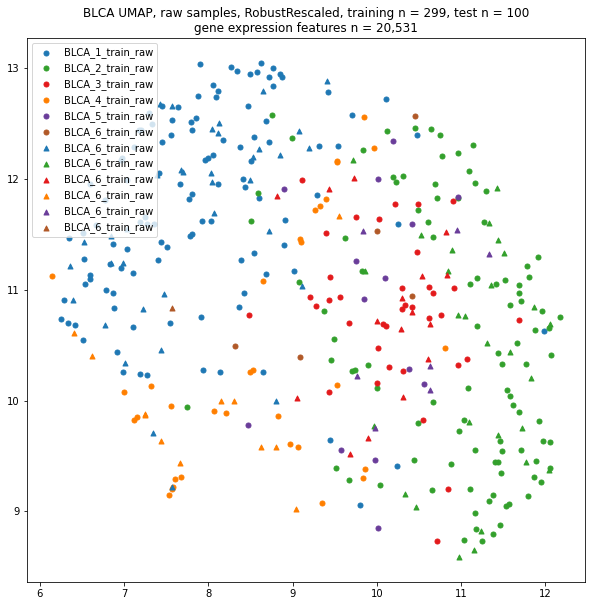

In [84]:
dot_size = 25

fig = plt.figure(figsize = (10, 10))

train_raw = 'BLCA_1_train_raw' # raw is odd color indices
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='o', label = train_raw)

train_raw = 'BLCA_2_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='o', label = train_raw)

train_raw = 'BLCA_3_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='o', label = train_raw)

train_raw = 'BLCA_4_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='o', label = train_raw)

train_raw = 'BLCA_5_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(9),
            marker='o', label = train_raw)

train_raw = 'BLCA_6_train_raw'
plt.scatter(embdDF[embdDF.Labels == train_raw].x,
            embdDF[embdDF.Labels == train_raw].y,
            s=dot_size, color=plt.cm.Paired(11),
            marker='o', label = train_raw)

# raw test blocks
test_raw = 'BLCA_1_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(1),
            marker='^', label = train_raw)

test_raw = 'BLCA_2_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(3),
            marker='^', label = train_raw)

test_raw = 'BLCA_3_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(5),
            marker='^', label = train_raw)

test_raw = 'BLCA_4_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(7),
            marker='^', label = train_raw)

test_raw = 'BLCA_5_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(9),
            marker='^', label = train_raw)

test_raw = 'BLCA_6_test_raw'
plt.scatter(embdDF[embdDF.Labels == test_raw].x,
            embdDF[embdDF.Labels == test_raw].y,
            s=dot_size, color=plt.cm.Paired(11),
            marker='^', label = train_raw)

plt.title('BLCA UMAP, raw samples, RobustRescaled, training n = 299, test n = 100\n'+
    'gene expression features n = 20,531')
          
plt.legend(loc = 'upper left')
plt.savefig('out/'+
            'BLCA_raw_robust_'+version+'_'+date+'_r1.png')

In [ ]:
# Devel notes

In [ ]:
# Original location
# gxp_file_paths = sorted(glob.glob('/Users/karlberb/work/sample_count/smpl_gen/gexp_files/*.tsv'))
# plotting normalized values, can reverse to original expression values

In [39]:
# Train
unit = pd.read_csv(
    '/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normed_data/train_norm.tsv',
        sep = '\t',
        index_col = 0)

In [44]:
# Test
unit = pd.read_csv(
    '/Users/karlberb/Desktop/RNB00978/sample_count/sample_gen/synthetic_TCGA_data_gen/a_data_structure/normed_data/test_norm.tsv',
        sep = '\t',
        index_col = 0)

In [ ]:
# light colors are even numbers, first set of color pairs
    # decoded samples as light colors, train as circles, test as triangles

# dark colors are odd numbers, second in color pairs
    # normalized raw as dark colors, train as circles, test as triangles

In [ ]:
# List of optimizations:
    Batch size
    Data type
    Layer count
    Filter count
    Epochs
    Pre-training scheme
    Latent dimension
    
    Paired colormap for 7-subtype cohorts
    
# Core functioinality:
    Two architechtures (defined by Layer-type)
    Automated UMAP (defined by taking arbitrary number of subtypes)

In [77]:
date

'2022_10_24'

In [80]:
version

'd_umap_normed_BRCA_01.ipynb'